# 7 Sings You've Become an Advanced Sklearn User Without Even Realizing It
# and a pro ML engineer with that...
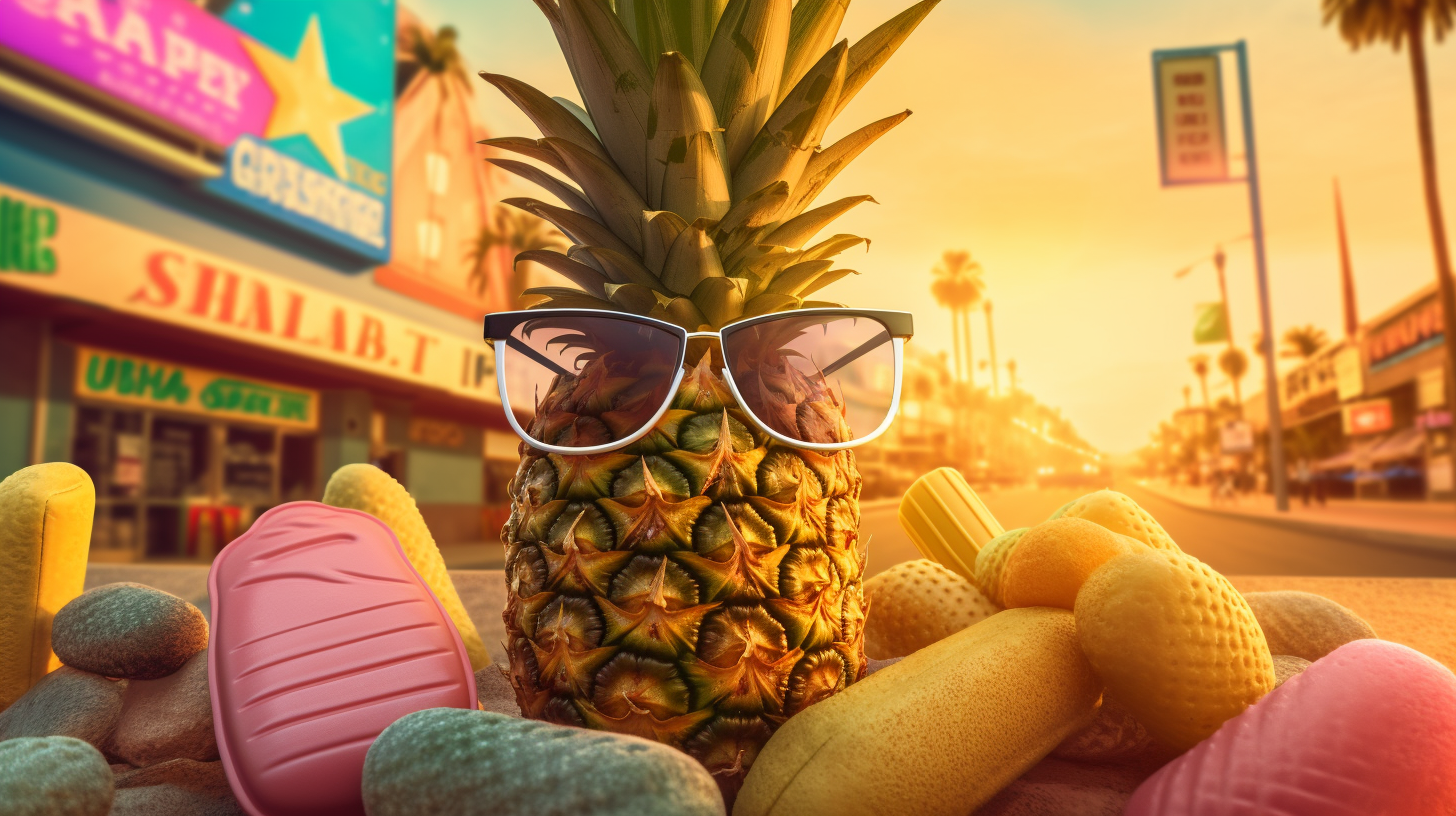

### Introduction

### 0. Three partitions

- Cassie Kozyrkov, head of Decision Intelligence at Google, says that data splitting is the most powerful idea in machine learning
- Data splitting is the greatest and most important thing you can do to combat overfitting
- Almost everything we do in machine learning is in service of avoiding overfitting
- If your stingy juices flaring up your brain, relax! It is 2023. Unless you are still working with Titanic, almost everybody has mounds of data.
- You have all the luxury to split the data not in two, but even better, three partitions!
- You train your chosen model on 50%, evaluate its performance on 25% of validation data, and after everything - training, evaluation, tuning - just when you think your baby is ready to be deployed into the real world, you test it one final time on the completely untouched and unlooked test set (25%).
- With this rule in mind, you've saved this code snippet on your desktop to copy/paste any time you want:

```
The code to split a dataset into three partitions with Sklearn.
```

- Three partitions are also the best way to avoid data leakage. 
- No matter how careful you are in not mixing your train and test sets, you might introduce leakage into test without even realizing
- For example, if you keep using the same set for hyperparameter tuning and testing, your model will overfit to it.
- The most basic one is holding out a part of the data as a test set to simulate and measure a model’s performance on unseen data. However, hyperparameters of the models can be tweaked until the model reaches the maximum score on that particular test set, which again means overfitting.
- SYDD! If an unexamined life is not worth living, then here are the four words to live by: Split Your Damned Data.
- Seriously, definitely read this post later:

https://towardsdatascience.com/the-most-powerful-idea-in-data-science-78b9cd451e72

### 1. Setting a common sense baseline

- How do you know if anything you are doing in your ML project is contributing to the end product, the perfect model?
- Here, "I know when I see it" approach is never going to cut it
- You need a North Star, something that you can always refer to to know if a task you just performed is any good
- Consider a simple imbalanced classification problem with 90/10 class ratio:

In [10]:
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=10000, weights=(0.9, 0.1))
X_train, X_test, y_train, y_test = train_test_split(X, y)


clf = DummyClassifier().fit(X_train, y_train)

clf.score(X_test, y_test)

0.896

- `DummyClassifier`, which simply generates random predictions, is able to get almost 90% accuracy without doing anything else. No feature engineering, no model selection, no tuning, nothing
- And now, consider you started your project without know this. 
- Wouldn't you be patting yourself on the back if you got close to 80% accuracy in your first few tries?
- You would have a sense of progress but that would be delusional because your tries aren't even as good as a random baseline
- This brings us to the second most important concept in an ML project
- Setting a common sense baseline you can compare all your machine learning projects
- A baseline will serve as an anchor, a foundation on which you build all your experiments
- At the start of your ML project, you don't have a way of comparing two models to each other
- You wouldn't know the difference between a masterpiece art and doodle on a napkin because the problem is entirely new to you
- You don't know if your chosen model can outperform a childish one that generates predictions randomly
- It also helps you avoid the pitfall of over-engineering where you pour your heart and soul into crafting an intricate model no better than random guessing. 
- Over-engineering is the horror of being utterly convincing that your model is exceptional only to realize it is just as effective as a monkey throwing darts blindfolded
- A baseline is a humble anchor you should use to check if your most powerful models can outperform a simple foundation
- I found this out the hard way. In one of my articles, I show a project that involves calculating a cuteness score (0-100) based on a pet's image
- After a dozen rounds of experiments involving increasingly complex Keras models, I couldn't move past a certain performance mark
- Getting desperate, I tried almost all suitable models in Sklearn, which included `DummyRegressor`
- And guess what?! `DummyRegresssor`, which performs random guessing, ended up outperforming all deep learning models!
- This suggested that the problem was unsolvable with machine learning (at least with the dataset at hand) and all my experiments were futile

- Did I just make this entire section about `DummyClassifier/Regressor`, the dumbest of models? I believe I just did - that's how important it is.

### 2. Feature selection vs. engineering

- When faced with a dataset with dozens or even hundreds of features, they will be mindful of their precious time and hardware resources
- Instead of blindly busting models on all existing features, they take a step back and try to isolate the most promising features.
- First, they might look at features one at a time, maybe use variance thresholding to drop the ones with insignificant variances. 
- Then, they look at the bigger picture by analyzing relationships between features and decide the worthy ones from there
- To aid in their decisions, they might use metrics such as pairwise correlation coefficients or even better, use model-based approaches using classes like RFECV (recursive feature elimination with CV) or `SelectFromModel`
- Afterwards, they apply their feature engineering magic to get the most out of the best features
- Here, their knowledge of the very intimate differences between numeric transformations such as normalization, standardization, and log transforms will be key. They know the trade-offs among `StandardScaler`, `MinMaxScaler`, `QuantileTransformer`, `PowerTransformer` and more like the back of their hand.
- They also know how to properly impute missing values. Beyond simple strategies like mean/mode imputation with `SimpleImputer`, they have a firm grasp on advanced model-based imputation techniques such as KNNImputer or IterativeImputer and can choose the most appropriate one based on the missingness type.
- As for categorical features, they use a variety of techniques to properly encode them such as OrdinalEncoder or OneHotEncoder. When using the latter, they will be careful of the dummy-variable trap which leaks multicollinearity into the dataset. 
- Even though I just listed feature selection and feature engineer one after the other, the old pros know that you shouldn't lock the two in rigid order
- They iterate between the two, experimenting and refining their approach iteratively.

### 3. Model selection

- This is where the pros show the many online machine learning courses they took or their fancy education didn't go down the drain. 
- With an air of total coolness and confidence, they intuitively select the most viable algorithms and model architectures for the given task
- Here, their aim is not always to choose the best performing model but the model that is the most suitable for the problem under existing constraints
- These constraints are like four giant barriers in their brain:

0. Computation resources - choosing simpler and smaller models if hardware is limited even at the cost of lower performance
1. Time constraints - using the old linear models or shallow trees when forests and deep learning models put too much pressure on their time and pocket.
2. Model complexity vs. performance trade-offs: striking a balance between powerful models with massive predictive power but prone to overfitting and simpleton models with lower complexity but sometimes leading to underfitting.
3. Interpretability: choosing linear models or trees when model explainability and stakeholder confidence are key
4. Dataset size: guiding selection based on data size as some models thrive on large datasets like deep learning models while the comfort zone of models like SVMs are small datasets

- Model selection is an art and they treat it like so.

### 4. Strategic cross-validation

- If there is one thing you like more than splitting your data into three, it is cross-validation
- When your time and resource constraints allow it, you try to use appropriate CV strategies all the time
- You know full well that CV is the method that gives the most reliable model performance estimation and thus, your greatest combatant to fight overfitting or underfitting
- Apart from simple `KFold` you learned in middle school, you leverage other powerful strategies, such as:
1. StratifiedKFold - classification
2. RepeatedKFold - when you are hypervigilant about model performance.
3. ShuffleSplit - more control on the train/test splits.
4. GroupKFold -  non-IID data (independent and identically distributed).
5. TimeSeriesSplit - time series data.

- In your cross-validation endeavors, Sklearn pipelines hold a special part. 
- Instead of doing preprocessing outside and modeling inside the CV splitter, you combine all into a single pipeline
- Pipelines are your extra safeguard over data leakage and how you make your code readable, modular and as a bonus, a total delight to others reading it.

### 5. Total control over randomness

- You don't joke around with randomness. 
- You learned painfully that having a tight leash on the monster that is the pseudo-random generator may save you hours in terms of:

    - Reproducibility
    - Debugging and testing
    - Model performance comparison
    - Hyperparameter tuning

- You are also justifiedly proud in knowing the differences between these intricate seeding methods:

1. `random_state=None` - Sklearn uses the global NumPy seed set with `np.random.seed(seed_number)` - the default behavior. In this case, each call to functions that use randomness such as `fit`, `train_test_split`, `split`, CV classes, etc. produces different results.
2. `random_state=integer` - calls to functions (like above) that use randomness always produce the same results for the given integer seed. You also have your favorite seed (mine is 1121218).
3. `random_state=np.random.RandomState` (an RNG instance) - a seeding method that gives the most robust CV results even though passing integers is safer and preferable. Returns different results in each run.

- And you have a weekly reminder on your iPhone to read the [Controlling randomness](https://scikit-learn.org/stable/common_pitfalls.html#controlling-randomness) section of the Sklearn user guide so that these details don't leak out from memory.

### 6. Not using Sklearn for hyperparameter tuning

- You respect Sklearn for introducing HalvingGridSreach and HalvingRandomSearch to try fixing the slower-than-a-turtle GridSearch but at this point of your workflow, you switch to other tools
- Like the cool kids of today, your preference is Optuna.
- It is way more Python, it is smart, and awful lot of features Sklearn won't even consider adding
- Your most favorite features of Optuna are:
    - Integration with almost anything: Jupyter, Sklearn, XGBoost, CatBoost, TF, Torch, you name it.
    - SOTA tuning algorithms with names you can't even pronounce
    - Automatic discarding unpromising hyperpameters way before tuning round starts
    - More Python and readable parameter grids
    - Visualization and analysis: parameter importance plots, parallel coordinate plots, and optimization history plots
    - Distributed computing to use multiple cores

- And your (most probably) favorite Optuna tutorial is this:

https://towardsdatascience.com/why-is-everyone-at-kaggle-obsessed-with-optuna-for-hyperparameter-tuning-7608fdca337c

### 7. Model evaluation on another level

- Just like you are a master at cooking the main course, you are a master at preparing the desert - model evaluation
- Hundreds of times in your life, you've called:

```python
import sklearn

sklearn.metrics.SCORERS.keys()
```

- to look at all the options you have for measuring your model's performance
- You don't choose one from this list but choose multiple metrics to test and optimize your model from various angles
- Your biggest strength in this regard is differentiating between all the crazy classification metrics and the subtle ways they change based on whether your chosen classifier is OVO or OVR. 
- You've also been called a geek a couple for setting these images as auto-changing wallpapers on your phone (but you aren't bothered in the slightest :).

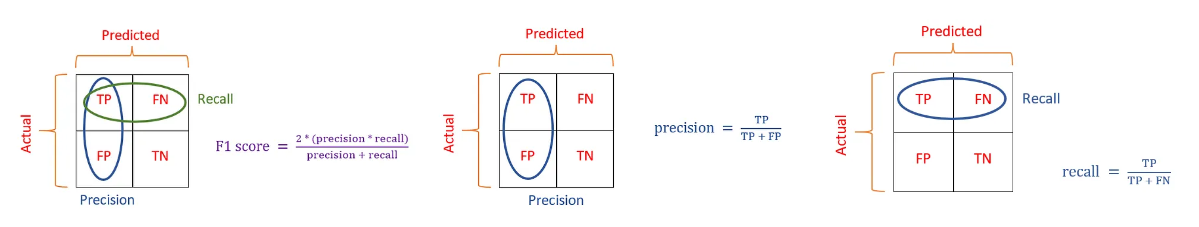
- And trying hard not to show off, you use some of the following visualization tools for a more accurate depiction of your model's performance:

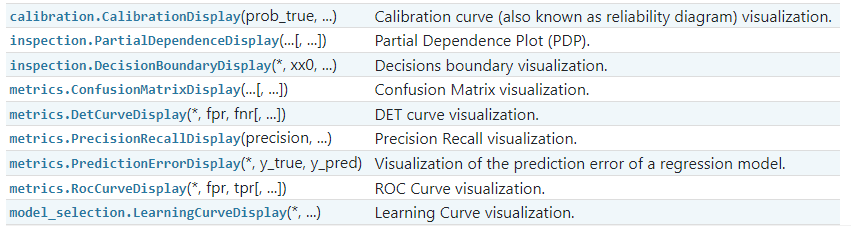

https://scikit-learn.org/stable/visualizations.html#available-plotting-utilities

### Conclusion